In [1]:
import os
import sys
import pylab
import torch

## relative path for files
#sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

## relative path for ipython notebook
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')  ) )

import numpy
import jammy_flows.flows as fbase
import jammy_flows.helper_fns as helper_fns

## A few examples how to construct PDFs. For 2-d PDFs the contours are shown using the exact PDF evaluations (black) and from samples (white).

### 2-d pdf euclidean pdf ("e2") with 4 gaussianization-flow layers ("gggg")

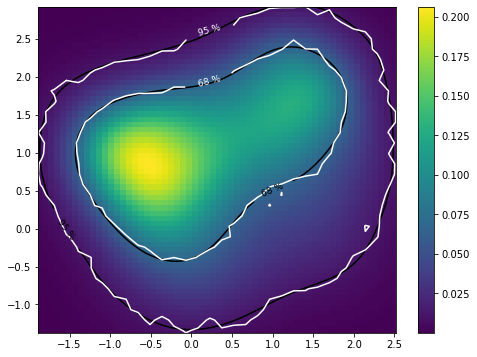

In [2]:

fived_pdf=fbase.pdf("e2", "gg")

fig=pylab.figure(figsize=(8,6))
_, _=helper_fns.visualize_pdf(fived_pdf,fig,nsamples=100000)


### 2-d spherical PDF. The PDF evaluations are multplied by sin(theta) for correct visualization.

Text(0, 0.5, '$\\phi$')

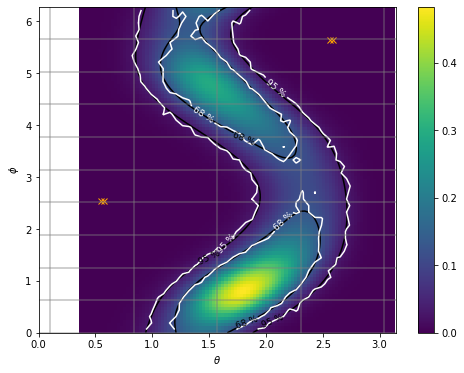

In [3]:
twod_spherical_pdf=fbase.pdf("s2", "n")

fig=pylab.figure(figsize=(8,6))

_, _=helper_fns.visualize_pdf(twod_spherical_pdf,fig,nsamples=100000)
pylab.gca().set_xlabel(r"$\theta$")
pylab.gca().set_ylabel(r"$\phi$")

### The same spherical PDF with an (area-preserving) lambert projection. No multiplication with sin(theta) necessary for plotting.

Text(0, 0.5, '$\\phi$')

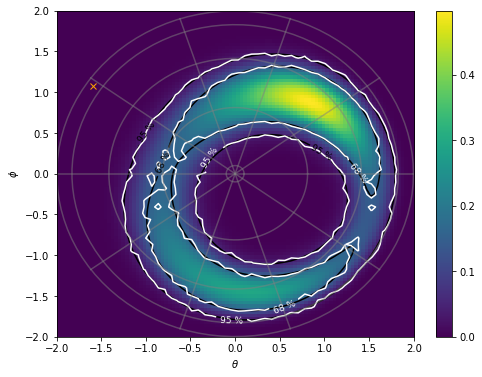

In [4]:
fig=pylab.figure(figsize=(8,6))

_, _=helper_fns.visualize_pdf(twod_spherical_pdf,fig,nsamples=100000, s2_norm="lambert")
pylab.gca().set_xlabel(r"$\theta$")
pylab.gca().set_ylabel(r"$\phi$")

### 5-d conditional PDF jointly defined over the 1-sphere (circle), 2-sphere, and 2-dim Euclidean space. Visualization for two different inputs shown. At initialization, conditional PDFs are initilialized such that the input has little influence on the final shape, so input is varied alot.

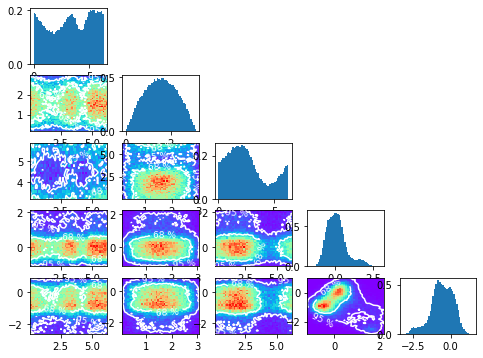

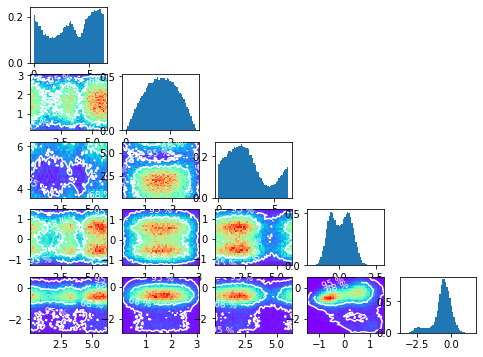

In [5]:
fived_pdf=fbase.pdf("s1+s2+e2", "m+v+gggg", conditional_input_dim=2)

fig=pylab.figure(figsize=(8,6))
_, _=helper_fns.visualize_pdf(fived_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([1.0,2.0]).type(torch.float64).unsqueeze(0) )

fig=pylab.figure(figsize=(8,6))
_, _=helper_fns.visualize_pdf(fived_pdf,fig,nsamples=100000, conditional_input=torch.Tensor([10000.0,10000.0]).type(torch.float64).unsqueeze(0) )

### 1-d conditional PDF defined on an interval from -5.5 to 10.0. At initialization, conditional PDFs are initilialized such that the input has little influence on the final shape, so input is varied alot.

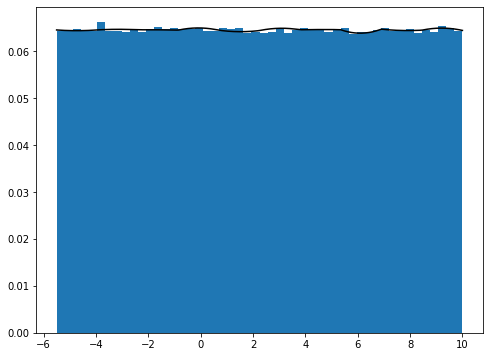

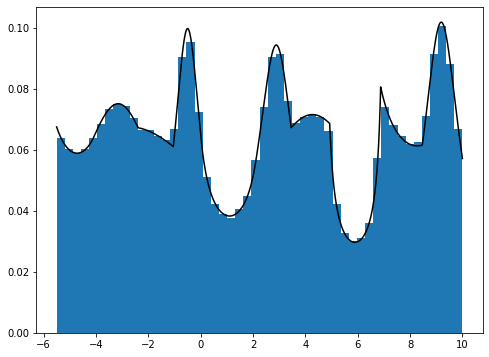

In [6]:
interval_pdf=fbase.pdf("i1_-5.5_10.0", "r", conditional_input_dim=2)

fig=pylab.figure(figsize=(8,6))
_, _=helper_fns.visualize_pdf(interval_pdf,fig,nsamples=1000000, conditional_input=torch.Tensor([100.0,150.0]).type(torch.float64).unsqueeze(0) )

fig=pylab.figure(figsize=(8,6))
_, _=helper_fns.visualize_pdf(interval_pdf,fig,nsamples=1000000, conditional_input=torch.Tensor([10000.0,10000.0]).type(torch.float64).unsqueeze(0) )